# Get the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('training.csv')

In [4]:
data.head()

,StId,O1,MA1,MI1,C1,V1,O2,MA2,MI2,C2,...,O499,MA499,MI499,C499,V499,O500,MA500,MI500,C500,V500
0,1,1,1.0163,0.99640,1.00000,1260000.0,1.00000,1.0055,0.99106,1.00000,...,0.89015,0.90284,0.87934,0.90097,3930000.0,0.90457,0.90457,0.88655,0.89015,1860000.0
1,2,1,1.0124,0.99160,0.99563,1720000.0,1.00400,1.0040,0.97882,0.98319,...,2.18490,2.18890,2.15970,2.18050,2890000.0,2.19730,2.20170,2.18050,2.18490,2040000.0
2,3,1,1.0000,0.98269,0.98269,335000.0,1.00430,1.0087,0.99135,0.99135,...,0.93184,0.94483,0.93184,0.93617,269000.0,0.93184,0.94050,0.91886,0.93184,395000.0
3,4,1,1.0152,1.00000,1.01030,227000.0,1.00490,1.0103,0.98441,1.00000,...,0.42043,0.44627,0.41017,0.44627,2370000.0,0.38966,0.41509,0.38433,0.41509,988000.0
4,5,1,1.0000,0.97850,0.97850,887000.0,0.98925,1.0056,0.98925,0.99486,...,1.28640,1.29630,1.27620,1.28640,1170000.0,1.27100,1.29160,1.26590,1.29160,969000.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Columns: 2501 entries, StId to V500
dtypes: float64(2499), int64(2)
memory usage: 1.8 MB


94 different stocks for $\frac{2500}{5} = 500$ days.

# Exploretory Analysis

Now let's see if the change of price in $n$ previuos days gives predisction power for the change of price in the $n+1$th day

we only need open and close of every day:

In [6]:
import re

# we use regular expression to select MA, MI and V columns in data
data_cols = data.columns
r = re.compile("^[MA, MI, V]")
drop_cols = filter(r.match, data_cols)

In [7]:
data.drop(columns = drop_cols, axis=1, inplace=True)
data.set_index('StId', inplace=True)

In [8]:
data

,O1,C1,O2,C2,O3,C3,O4,C4,O5,C5,...,O496,C496,O497,C497,O498,C498,O499,C499,O500,C500
StId,,,,,,,,,,,,,,,,,,,,,
1,1,1.00000,1.00000,1.00000,1.00550,1.00000,0.98919,1.00550,0.98385,0.98919,...,0.98025,0.99467,0.96757,0.98025,0.90097,0.96757,0.89015,0.90097,0.90457,0.89015
2,1,0.99563,1.00400,0.98319,1.00400,1.00000,1.00400,1.00000,1.00400,1.00840,...,2.10080,2.10520,2.11760,2.09240,2.21850,2.14290,2.18490,2.18050,2.19730,2.18490
3,1,0.98269,1.00430,0.99135,0.98269,0.99567,1.00000,0.99135,0.98269,1.00000,...,0.99207,0.99207,0.94915,0.99639,0.94483,0.94915,0.93184,0.93617,0.93184,0.93184
4,1,1.01030,1.00490,1.00000,1.01520,1.01520,0.97949,1.01520,0.96390,0.97416,...,0.43068,0.42576,0.42576,0.42576,0.44627,0.42043,0.42043,0.44627,0.38966,0.41509
5,1,0.97850,0.98925,0.99486,1.00000,0.99486,1.00000,0.98925,1.00000,1.00560,...,1.24070,1.25090,1.30650,1.24580,1.29160,1.32660,1.28640,1.28640,1.27100,1.29160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1,0.98985,0.99513,1.01540,1.02030,1.00000,1.01020,1.02560,1.01020,1.01540,...,1.41670,1.40660,1.45210,1.43180,1.42160,1.44190,1.38100,1.42690,1.36600,1.39640
91,1,0.96547,1.00510,0.99033,1.01520,1.01010,1.00510,1.01520,0.99540,1.00000,...,1.37340,1.35960,1.37800,1.37340,1.40560,1.38260,1.38720,1.40560,1.40560,1.38720
92,1,0.98542,1.00990,0.99527,1.01970,1.01970,1.00990,1.02960,1.02960,1.01500,...,2.28140,2.25190,2.29600,2.28620,2.32560,2.31100,2.27630,2.32560,2.22700,2.28140


we use 10 last days as test data

<AxesSubplot:>

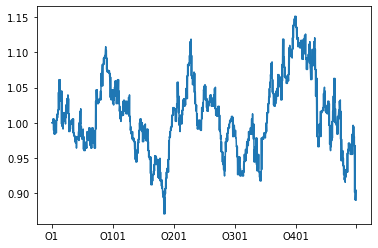

In [9]:
data.iloc[0,:].plot()

<AxesSubplot:>

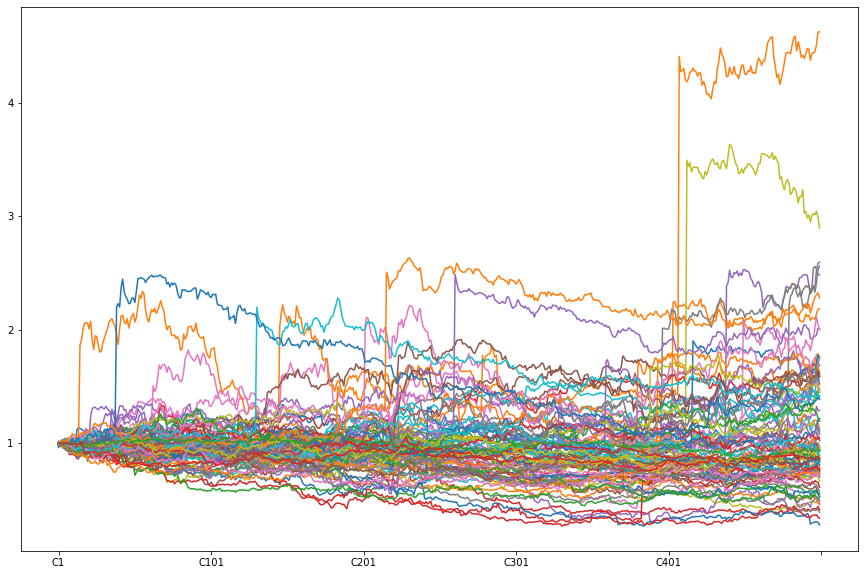

In [13]:
# we use regular expression to select Close columns in data
close_cols = data.columns
r = re.compile("^C")
close_cols = filter(r.match, close_cols)

data[close_cols].T.plot(figsize=(15,10), legend=False)

In [14]:
memory_days = 10
num_cols = 2 # open and close columns
start_day = 1
last_day = 490
X_windows = [0] # so the next loop starts at day=1 (workaround)

# scale a dataframe so the first column is 1
def scaler(df):
    for column in df.columns:
        df[column] = df[column] / df.iloc[:,0]
    return df

for day in range(start_day, last_day+1):
    rolling_window = data.iloc[:, day*num_cols-num_cols:(day+memory_days)*num_cols-num_cols]
    # scale data to O1 
    rolling_window_scaled = scaler(rolling_window)
    X_windows.append(rolling_window_scaled)
    # set equal column names for all dataframe to concatenate
    X_windows[day].columns = X_windows[start_day].columns

X_windows_list = [X_windows[day] for day in range(start_day, last_day+1)]    
X_windows_con = pd.concat(X_windows_list)    

In [15]:
X_windows_con

,O1,C1,O2,C2,O3,C3,O4,C4,O5,C5,O6,C6,O7,C7,O8,C8,O9,C9,O10,C10
StId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.00000,1.00000,1.00000,1.00550,1.00000,0.98919,1.00550,0.98385,0.98919,0.98746,0.98385,0.98558,0.98746,1.00360,0.98558,1.00720,1.00360,1.01270,1.00720
2,1.0,0.99563,1.00400,0.98319,1.00400,1.00000,1.00400,1.00000,1.00400,1.00840,0.99563,0.99563,0.96639,0.98723,0.96639,0.97042,0.94958,0.97042,0.94118,0.95798
3,1.0,0.98269,1.00430,0.99135,0.98269,0.99567,1.00000,0.99135,0.98269,1.00000,0.97836,0.98269,0.98269,0.97404,0.99567,0.98702,0.98702,0.99567,0.98702,0.98269
4,1.0,1.01030,1.00490,1.00000,1.01520,1.01520,0.97949,1.01520,0.96390,0.97416,0.94832,0.95857,0.90771,0.94340,0.90238,0.90238,0.90238,0.90238,0.89746,0.91263
5,1.0,0.97850,0.98925,0.99486,1.00000,0.99486,1.00000,0.98925,1.00000,1.00560,1.01640,1.00000,1.01070,1.01070,1.01070,1.01070,1.02150,1.00560,1.00560,1.02150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1.0,1.40660,1.41670,1.42160,1.42160,1.40130,1.41150,1.42690,1.42160,1.40130,1.42690,1.42690,1.41670,1.40660,1.45210,1.43180,1.42160,1.44190,1.38100,1.42690
91,1.0,1.32320,1.34580,1.34120,1.36420,1.33700,1.34580,1.35960,1.35040,1.34580,1.35040,1.35500,1.37340,1.35960,1.37800,1.37340,1.40560,1.38260,1.38720,1.40560
92,1.0,2.20260,2.19750,2.23220,2.25660,2.18760,2.13840,2.22700,2.19270,2.14820,2.22230,2.19750,2.28140,2.25190,2.29600,2.28620,2.32560,2.31100,2.27630,2.32560


In [16]:
n_stocks = 94
train_data = X_windows_con.iloc[:(last_day-1)*n_stocks, :]
test_data = X_windows_con.iloc[(last_day-1)*n_stocks:, :]

In [17]:
train_data

,O1,C1,O2,C2,O3,C3,O4,C4,O5,C5,O6,C6,O7,C7,O8,C8,O9,C9,O10,C10
StId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.00000,1.00000,1.00000,1.00550,1.00000,0.98919,1.00550,0.98385,0.98919,0.98746,0.98385,0.98558,0.98746,1.00360,0.98558,1.00720,1.00360,1.01270,1.00720
2,1.0,0.99563,1.00400,0.98319,1.00400,1.00000,1.00400,1.00000,1.00400,1.00840,0.99563,0.99563,0.96639,0.98723,0.96639,0.97042,0.94958,0.97042,0.94118,0.95798
3,1.0,0.98269,1.00430,0.99135,0.98269,0.99567,1.00000,0.99135,0.98269,1.00000,0.97836,0.98269,0.98269,0.97404,0.99567,0.98702,0.98702,0.99567,0.98702,0.98269
4,1.0,1.01030,1.00490,1.00000,1.01520,1.01520,0.97949,1.01520,0.96390,0.97416,0.94832,0.95857,0.90771,0.94340,0.90238,0.90238,0.90238,0.90238,0.89746,0.91263
5,1.0,0.97850,0.98925,0.99486,1.00000,0.99486,1.00000,0.98925,1.00000,1.00560,1.01640,1.00000,1.01070,1.01070,1.01070,1.01070,1.02150,1.00560,1.00560,1.02150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1.0,1.40660,1.39110,1.40660,1.41670,1.42160,1.42160,1.40130,1.41150,1.42690,1.42160,1.40130,1.42690,1.42690,1.41670,1.40660,1.45210,1.43180,1.42160,1.44190
91,1.0,1.30940,1.34120,1.32320,1.34580,1.34120,1.36420,1.33700,1.34580,1.35960,1.35040,1.34580,1.35040,1.35500,1.37340,1.35960,1.37800,1.37340,1.40560,1.38260
92,1.0,2.18290,2.24200,2.20260,2.19750,2.23220,2.25660,2.18760,2.13840,2.22700,2.19270,2.14820,2.22230,2.19750,2.28140,2.25190,2.29600,2.28620,2.32560,2.31100


In [18]:
test_data

,O1,C1,O2,C2,O3,C3,O4,C4,O5,C5,O6,C6,O7,C7,O8,C8,O9,C9,O10,C10
StId,,,,,,,,,,,,,,,,,,,,
1,1.0,0.96584,0.95502,0.95675,0.96944,0.95502,0.95502,0.96944,0.98385,0.95502,0.99467,0.99640,0.98025,0.99467,0.96757,0.98025,0.90097,0.96757,0.89015,0.90097
2,1.0,2.09240,2.12610,2.13880,2.17650,2.11760,2.07160,2.13040,2.09240,2.08400,2.09240,2.10520,2.10080,2.10520,2.11760,2.09240,2.21850,2.14290,2.18490,2.18050
3,1.0,0.93617,0.94915,0.94050,0.99639,0.95348,1.01330,1.00070,1.00500,1.01770,0.99639,1.00500,0.99207,0.99207,0.94915,0.99639,0.94483,0.94915,0.93184,0.93617
4,1.0,0.42576,0.42043,0.40484,0.43068,0.42043,0.39992,0.42043,0.41017,0.39992,0.43068,0.42043,0.43068,0.42576,0.42576,0.42576,0.44627,0.42043,0.42043,0.44627
5,1.0,1.23550,1.22060,1.25090,1.25090,1.22570,1.21540,1.24070,1.26070,1.22060,1.25090,1.25610,1.24070,1.25090,1.30650,1.24580,1.29160,1.32660,1.28640,1.28640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1.0,1.40660,1.41670,1.42160,1.42160,1.40130,1.41150,1.42690,1.42160,1.40130,1.42690,1.42690,1.41670,1.40660,1.45210,1.43180,1.42160,1.44190,1.38100,1.42690
91,1.0,1.32320,1.34580,1.34120,1.36420,1.33700,1.34580,1.35960,1.35040,1.34580,1.35040,1.35500,1.37340,1.35960,1.37800,1.37340,1.40560,1.38260,1.38720,1.40560
92,1.0,2.20260,2.19750,2.23220,2.25660,2.18760,2.13840,2.22700,2.19270,2.14820,2.22230,2.19750,2.28140,2.25190,2.29600,2.28620,2.32560,2.31100,2.27630,2.32560


In [19]:
# set columns to day 1-10
X_test = test_data.drop(columns = ['C10'])

In [20]:
X_test

,O1,C1,O2,C2,O3,C3,O4,C4,O5,C5,O6,C6,O7,C7,O8,C8,O9,C9,O10
StId,,,,,,,,,,,,,,,,,,,
1,1.0,0.96584,0.95502,0.95675,0.96944,0.95502,0.95502,0.96944,0.98385,0.95502,0.99467,0.99640,0.98025,0.99467,0.96757,0.98025,0.90097,0.96757,0.89015
2,1.0,2.09240,2.12610,2.13880,2.17650,2.11760,2.07160,2.13040,2.09240,2.08400,2.09240,2.10520,2.10080,2.10520,2.11760,2.09240,2.21850,2.14290,2.18490
3,1.0,0.93617,0.94915,0.94050,0.99639,0.95348,1.01330,1.00070,1.00500,1.01770,0.99639,1.00500,0.99207,0.99207,0.94915,0.99639,0.94483,0.94915,0.93184
4,1.0,0.42576,0.42043,0.40484,0.43068,0.42043,0.39992,0.42043,0.41017,0.39992,0.43068,0.42043,0.43068,0.42576,0.42576,0.42576,0.44627,0.42043,0.42043
5,1.0,1.23550,1.22060,1.25090,1.25090,1.22570,1.21540,1.24070,1.26070,1.22060,1.25090,1.25610,1.24070,1.25090,1.30650,1.24580,1.29160,1.32660,1.28640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1.0,1.40660,1.41670,1.42160,1.42160,1.40130,1.41150,1.42690,1.42160,1.40130,1.42690,1.42690,1.41670,1.40660,1.45210,1.43180,1.42160,1.44190,1.38100
91,1.0,1.32320,1.34580,1.34120,1.36420,1.33700,1.34580,1.35960,1.35040,1.34580,1.35040,1.35500,1.37340,1.35960,1.37800,1.37340,1.40560,1.38260,1.38720
92,1.0,2.20260,2.19750,2.23220,2.25660,2.18760,2.13840,2.22700,2.19270,2.14820,2.22230,2.19750,2.28140,2.25190,2.29600,2.28620,2.32560,2.31100,2.27630


In [21]:
y_test = (test_data.loc[:,'C10'] > test_data.loc[:,'O10']).astype('uint8')

In [22]:
y_test

StId
1     1
2     0
3     1
4     1
5     0
     ..
90    1
91    1
92    1
93    1
94    1
Length: 94, dtype: uint8

In [23]:
# We set 9 days data to be the predictor of the 10th day
X_train = train_data.drop(columns = ['C10'])

In [24]:
X_train

,O1,C1,O2,C2,O3,C3,O4,C4,O5,C5,O6,C6,O7,C7,O8,C8,O9,C9,O10
StId,,,,,,,,,,,,,,,,,,,
1,1.0,1.00000,1.00000,1.00000,1.00550,1.00000,0.98919,1.00550,0.98385,0.98919,0.98746,0.98385,0.98558,0.98746,1.00360,0.98558,1.00720,1.00360,1.01270
2,1.0,0.99563,1.00400,0.98319,1.00400,1.00000,1.00400,1.00000,1.00400,1.00840,0.99563,0.99563,0.96639,0.98723,0.96639,0.97042,0.94958,0.97042,0.94118
3,1.0,0.98269,1.00430,0.99135,0.98269,0.99567,1.00000,0.99135,0.98269,1.00000,0.97836,0.98269,0.98269,0.97404,0.99567,0.98702,0.98702,0.99567,0.98702
4,1.0,1.01030,1.00490,1.00000,1.01520,1.01520,0.97949,1.01520,0.96390,0.97416,0.94832,0.95857,0.90771,0.94340,0.90238,0.90238,0.90238,0.90238,0.89746
5,1.0,0.97850,0.98925,0.99486,1.00000,0.99486,1.00000,0.98925,1.00000,1.00560,1.01640,1.00000,1.01070,1.01070,1.01070,1.01070,1.02150,1.00560,1.00560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1.0,1.40660,1.39110,1.40660,1.41670,1.42160,1.42160,1.40130,1.41150,1.42690,1.42160,1.40130,1.42690,1.42690,1.41670,1.40660,1.45210,1.43180,1.42160
91,1.0,1.30940,1.34120,1.32320,1.34580,1.34120,1.36420,1.33700,1.34580,1.35960,1.35040,1.34580,1.35040,1.35500,1.37340,1.35960,1.37800,1.37340,1.40560
92,1.0,2.18290,2.24200,2.20260,2.19750,2.23220,2.25660,2.18760,2.13840,2.22700,2.19270,2.14820,2.22230,2.19750,2.28140,2.25190,2.29600,2.28620,2.32560


now check if the n+1th day was moving up or down:

In [26]:
y_train = (train_data.loc[:,'C10'] > train_data.loc[:,'O10']).astype('uint8')

In [27]:
y_train

StId
1     0
2     1
3     0
4     1
5     1
     ..
90    1
91    0
92    0
93    0
94    1
Length: 45966, dtype: uint8

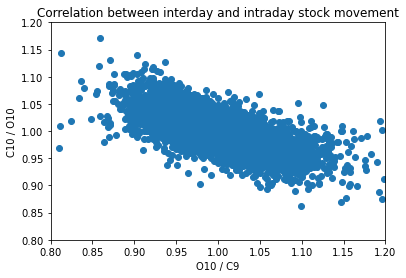

In [28]:
plt.scatter(train_data.loc[:,'O10']/train_data.loc[:,'C9'], train_data.loc[:,'C10']/train_data.loc[:,'O10'])
plt.xlim((.8,1.2)); plt.ylim((.8,1.2))
plt.xlabel("O10 / C9"); plt.ylabel("C10 / O10")
plt.title("Correlation between interday and intraday stock movement")
plt.show()

# Model

In [29]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics,preprocessing
from sklearn.model_selection import cross_val_predict

In [30]:
forest_clf = RandomForestClassifier(random_state=42)
params = forest_clf.get_params()
print(params)
y_predict = cross_val_predict(forest_clf, X_train, y_train, cv=5)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


let's look at confusion matrix

In [31]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_predict)

In [32]:
# normalize confusion matrix
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
norm_conf_mx

array([[0.87332398, 0.12667602],
       [0.26095519, 0.73904481]])

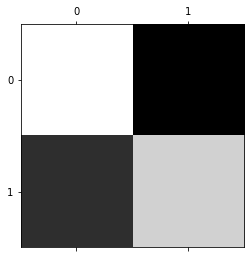

In [33]:
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [34]:
from sklearn.metrics import f1_score

f1_score(y_train, y_predict)

0.7783251231527093

Another metric would be AUC.

The roc_curve() function expects labels and scores, but instead of scores
you can give it class probabilities. Let’s use the positive class’s probability
as the score:

In [35]:
from sklearn.metrics import roc_curve

roc_measure = True
if roc_measure == True:
    y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=5, method="predict_proba")
    y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
    fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)

Now you are ready to plot the ROC curve. It is useful to plot the first ROC
curve as well to see how they compare

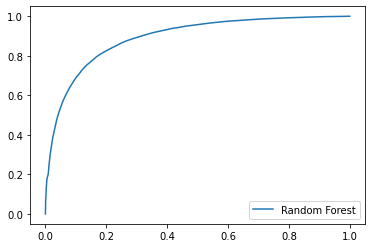

In [36]:
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.legend(loc="lower right")
plt.show()

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores_forest)

0.891143088758174

In [38]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predict and plot the prediction

In [39]:
y_pred = forest_clf.predict(X_test)

In [40]:
conf_mx_test = confusion_matrix(y_test, y_pred)
conf_mx_test

array([[12,  4],
       [18, 60]])

In [41]:
# normalize confusion matrix
row_sums = conf_mx_test.sum(axis=1, keepdims=True)
norm_conf_mx_test = conf_mx_test / row_sums
norm_conf_mx_test

array([[0.75      , 0.25      ],
       [0.23076923, 0.76923077]])

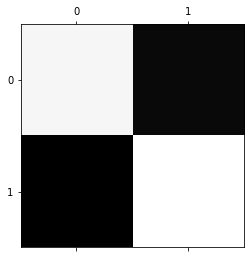

In [42]:
plt.matshow(norm_conf_mx_test, cmap=plt.cm.gray)
plt.show()

In [43]:
f1_score(y_test, y_pred)

0.8450704225352113